# Задание 1


Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [66]:
# Импортируйте библиотеки pandas и numpy

import numpy as np
import pandas as pd

In [67]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

from sklearn.datasets import load_boston

# Создайте датафреймы X и y из этих данных

boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [69]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции 
# train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент 
# random_state должен быть равен 42


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [71]:
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [72]:
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7112260057484887

# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [76]:
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12,random_state=42)

In [75]:
?RandomForestRegressor

In [77]:
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression

model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)

In [79]:
# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

r2_score(y_test, y_pred)
print("Модель случайных деревьев показывает значительно лучший результат по сравнению с линейной регрессией на данном примере")

Модель случайных деревьев показывает значительно лучший результат по сравнению с линейной регрессией на данном примере


# Задание 3
Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.


In [112]:
a = list(model.feature_importances_)
b = a.copy()
b.sort()

In [113]:
# С помощью этого атрибута найдите сумму всех показателей важности, 
#установите, какие два признака показывают наибольшую важность.


print(X_train.columns.values[a.index(b[-1])],'and',X_train.columns.values[a.index(b[-2])])

LSTAT and RM


In [114]:
sum(model.feature_importances_)

1.0

# Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.


In [142]:
# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
# Загрузите датасет creditcard.csv и создайте датафрейм df.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('creditcard.csv')

In [143]:
# С помощью метода  с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
# Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: 
# pd.options.display.max_columns = 100.
# Просмотрите первые 10 строк датафрейма df.

In [144]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [127]:
pd.options.display.max_columns = 100

In [145]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
# Создайте датафрейм X из датафрейма df, исключив столбец Class.

X =  df.drop(['Class'], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [148]:
# Создайте объект Series под названием y из столбца Class.

y = pd.Series(df['Class'])

In [149]:
# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, 
# используя аргументы: test_size=0.3, random_state=100, stratify=y.
# У вас должны получиться объекты X_train, X_test, y_train и y_test.
# Просмотрите информацию о их форме.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3322, 30), (278209, 30), (3322,), (278209,))

In [151]:
# Для поиска по сетке параметров задайте такие параметры:
    
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

# Создайте модель GridSearchCV со следующими аргументами:

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

In [152]:
# Обучите модель на тренировочном наборе данных (может занять несколько минут)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [153]:
# Просмотрите параметры лучшей модели с помощью атрибута best_params_

clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 10}

In [156]:
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) 
# и запишите в массив y_pred_proba. 

y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.01356895, 0.00999393, 0.01007158, ..., 0.00938274, 0.00999393,
       0.08114238])

In [158]:
# Из модуля sklearn.metrics импортируйте метрику roc_auc_score

from sklearn.metrics import roc_auc_score

In [159]:
# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, 
# используя в качестве аргументовмассивы y_test и y_pred_proba.

roc_auc_score(y_test, y_pred_proba)

0.96806584125432

# Дополнительные задания:

In [34]:
# 1) Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data

from sklearn.datasets import load_wine

wine = load_wine()

In [35]:
# 2) Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

data_keys = wine.keys()
print(*data_keys)
type(wine)

data target target_names DESCR feature_names


sklearn.utils.Bunch

In [36]:
# 3) Просмотрите данные, описание и названия признаков в датасете. 
# Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, 
# но с самими переносами и т.д

for line in wine.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [51]:
# 4). Сколько классов содержит целевая переменная датасета? Выведите названия классов
print(*wine.target_names)
len(wine.target_names)

class_0 class_1 class_2


3

In [52]:
# 5). На основе данных датасета и названий признаков создайте датафрейм под названием X

data = wine.data
target = wine.target
feature_names = wine.feature_names

X = pd.DataFrame(data, columns = feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [53]:
# 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
X.shape

(178, 13)

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.1 KB


In [64]:
# 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

y = pd.DataFrame(target, columns = ['target'])
y['target'].astype('int64')
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [117]:
import seaborn as sns
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt

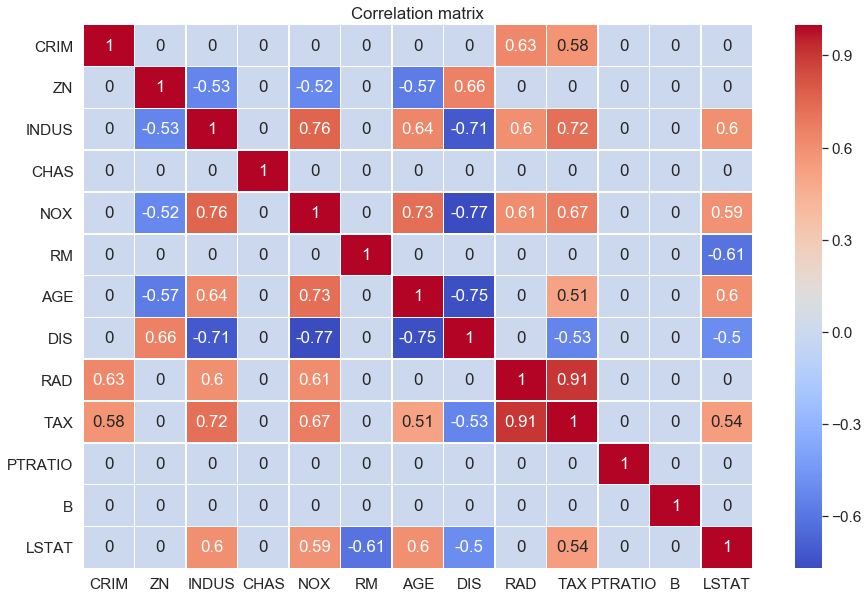

In [118]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0  

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()